In [1]:
from DQN.train import train
from DQN.DQN_agent import Agent
from DQN.model import Model

from shared.memory_manager import MemoryManager

import torch
import torch.optim as optim

from kaggle_environments import make
from kaggle_environments.envs.hungry_geese.hungry_geese import Configuration

import numpy as np
import matplotlib.pyplot as plt

Loading environment football failed: No module named 'gfootball'


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

memory_manager = MemoryManager(2000, 0.99)

model = Model()
model.set_config(Configuration({"columns": 11, "rows": 7}))

#model.load_state_dict(torch.load("DQN/model"))
model.eval()

model.to(device)

#optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)
#optimizer.load_state_dict(torch.load("DQN/opzimizer"))

def epsilon(iteration):
    return 0.1

def greedy(iteration):
    return 0

agent = Agent(model, epsilon)
agent.model.device = device


cuda


In [3]:
params = {}
params["sampeling_count"] = 5
params["batch_size"] = 50
params["training_time"] = 5000

# opponents = ["main.py", "main.py", "main.py"]
opponents = ["greedy", "better_random.py", "better_random.py"]
env = make("hungry_geese", debug=False)

trainer = env.train([None, *opponents])


#agent.epsilon = greedy


In [4]:
rewards, best_params = train(agent, memory_manager, optimizer, device, trainer, params)

rs alive: 2, timesteps: 10
NORTH: 10.00% (1), EAST: 10.00% (1), SOUTH: 0.00% (0), WEST: 80.00% (8), 
Current Iteration 85/200, 42.50% 
-184.54893888558402

survived: False, others alive: 1, timesteps: 37
NORTH: 2.70% (1), EAST: 0.00% (0), SOUTH: 0.00% (0), WEST: 97.30% (36), 
Current Iteration 86/200, 43.00% 
-70.34476949995693

survived: False, others alive: 3, timesteps: 11
NORTH: 0.00% (0), EAST: 0.00% (0), SOUTH: 0.00% (0), WEST: 100.00% (11), 
Current Iteration 87/200, 43.50% 
-274.0551742450923

survived: False, others alive: 1, timesteps: 31
NORTH: 9.68% (3), EAST: 0.00% (0), SOUTH: 3.23% (1), WEST: 87.10% (27), 
Current Iteration 88/200, 44.00% 
-74.71720943315964

survived: False, others alive: 2, timesteps: 17
NORTH: 11.76% (2), EAST: 0.00% (0), SOUTH: 0.00% (0), WEST: 88.24% (15), 
Current Iteration 89/200, 44.50% 
-172.0116709282577

survived: False, others alive: 1, timesteps: 27
NORTH: 3.70% (1), EAST: 0.00% (0), SOUTH: 3.70% (1), WEST: 92.59% (25), 
Current Iteration 90/

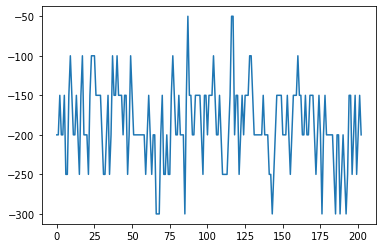

In [5]:

N = int(len(memory_manager.rewards) / 100)
plt.plot(np.convolve(memory_manager.rewards, np.ones(N)/N, mode='valid'))


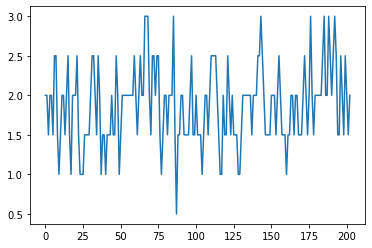

In [6]:

plt.plot(np.convolve(memory_manager.places, np.ones(N)/N, mode='valid'))

In [8]:
torch.save(model.state_dict(), "DQN/model")
torch.save(optimizer.state_dict(), "DQN/opzimizer")

!tar -czvf submission.tar.gz main.py DQN/model DQN/DQN_agent.py DQN/model.py shared/map.py


a main.py
a DQN/model
a DQN/DQN_agent.py
a DQN/model.py
a shared/map.py
